# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

# Data Exploration

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data1 = pd.read_excel('Shear_Wall_Strength_Database.xlsx', sheet_name='NewDatabase')
data1.head()

,Unnamed: 0,Author,Specimen,Number,Number.1,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,hw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,fc,τmax
0,1,Lefas et al. (1990a),SW11,1,197,1.000000,8.333333,0.050515,0.026268,0.954181,0.026268,0.000000,0.000000,19.400,1.650000
1,2,Lefas et al. (1990a),SW12,2,234,0.559688,24.880597,0.157426,0.179372,0.799852,0.195462,0.195703,0.000000,18.300,5.257456
2,3,Lefas et al. (1990a),SW13,3,244,2.200000,8.000000,0.086551,0.092531,0.322530,0.144580,0.216293,0.000000,18.216,1.909472
3,4,Lefas et al. (1990a),SW14,4,270,2.100000,10.000000,0.012289,0.032444,0.137836,0.039326,0.136487,0.000000,73.560,3.326000
4,5,Lefas et al. (1990a),SW15,5,137,0.842105,57.000000,0.326964,0.326964,0.541458,0.013994,0.000000,0.307692,31.900,4.016239


In [3]:
data1.columns   # display column names

Index(['Unnamed: 0', 'Author', 'Specimen', 'Number', 'Number.1', 'M/Vlw',
       'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,hw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc',
       'P/fcAg', 'Ab/Ag', 'fc', 'τmax'],
      dtype='object')

In [4]:
data=data1.loc[:, 'M/Vlw':'τmax']
data.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,hw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,fc,τmax
0,1.000000,8.333333,0.050515,0.026268,0.954181,0.026268,0.000000,0.000000,19.400,1.650000
1,0.559688,24.880597,0.157426,0.179372,0.799852,0.195462,0.195703,0.000000,18.300,5.257456
2,2.200000,8.000000,0.086551,0.092531,0.322530,0.144580,0.216293,0.000000,18.216,1.909472
3,2.100000,10.000000,0.012289,0.032444,0.137836,0.039326,0.136487,0.000000,73.560,3.326000
4,0.842105,57.000000,0.326964,0.326964,0.541458,0.013994,0.000000,0.307692,31.900,4.016239


In [5]:
print(data.shape)

(391, 10)


# Checking the data types, If string exists it should be converted into numerical values

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   M/Vlw        391 non-null    float64
 1   lw/tw        391 non-null    float64
 2   ρvwFy,vw/fc  391 non-null    float64
 3   ρhwFy,hw/fc  391 non-null    float64
 4   ρvcFy,vc/fc  391 non-null    float64
 5   ρhcFy,hc/fc  391 non-null    float64
 6   P/fcAg       391 non-null    float64
 7   Ab/Ag        391 non-null    float64
 8   fc           391 non-null    float64
 9   τmax         391 non-null    float64
dtypes: float64(10)
memory usage: 30.7 KB
None


In [7]:
#checking missing values by column
data.isnull().sum()

M/Vlw          0
lw/tw          0
ρvwFy,vw/fc    0
ρhwFy,hw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
P/fcAg         0
Ab/Ag          0
fc             0
τmax           0
dtype: int64

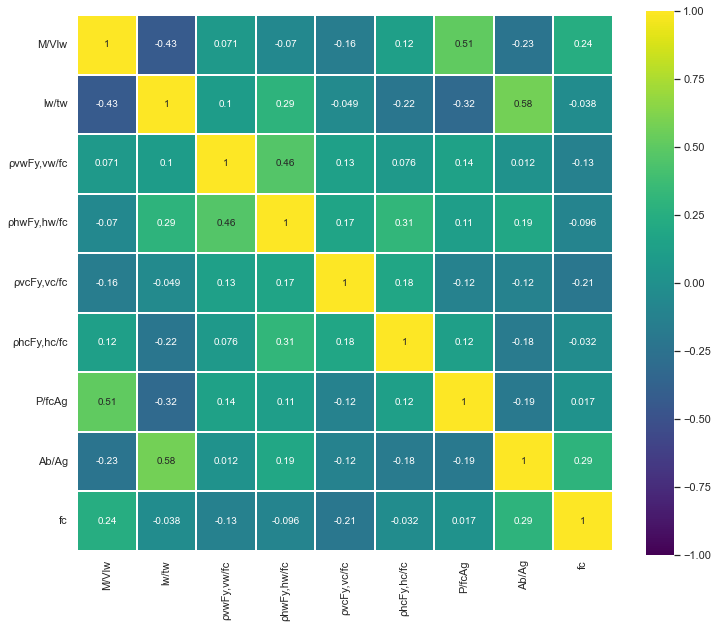

In [8]:
corr = data.drop('τmax', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

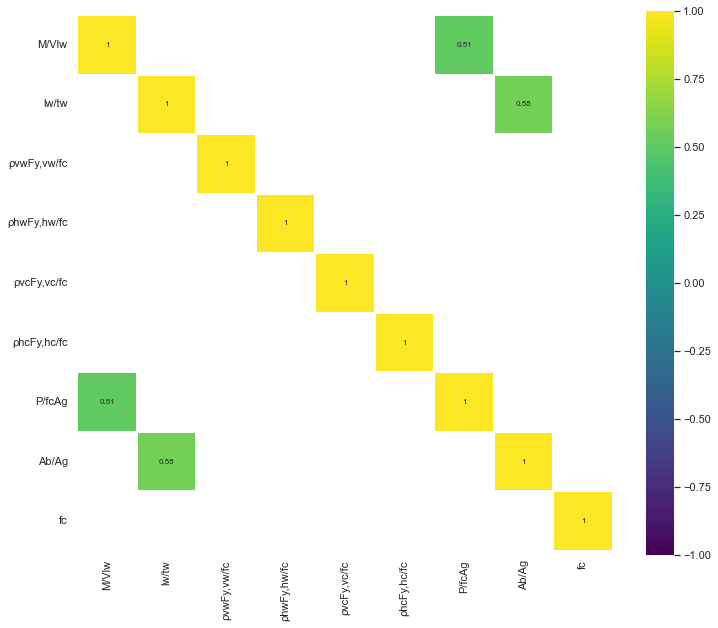

In [9]:
# Plottinf correlation above or below 0.5
corr = data.drop('τmax', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [10]:
features = list(data.columns.values)
print(features)

['M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,hw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Ab/Ag', 'fc', 'τmax']


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lip\AppData\Local\Temp\ipykernel_22304\3183815065.py", line 7, in <cell line: 7>
    plt.savefig('seaborn_plot1.eps',format='eps', dpi=1000)
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\pyplot.py", line 979, in savefig
    plt.axes(ax)
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\figure.py", line 3046, in savefig
    # only Figure can have toolbars
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\backend_bases.py", line 2319, in print_figure
    renderer, bbox_extra_artists=bbox_extra_artists)
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\_api\deprecation.py", line 415, in wrapper
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\backends\backend_ps.py", line 869, in _pri

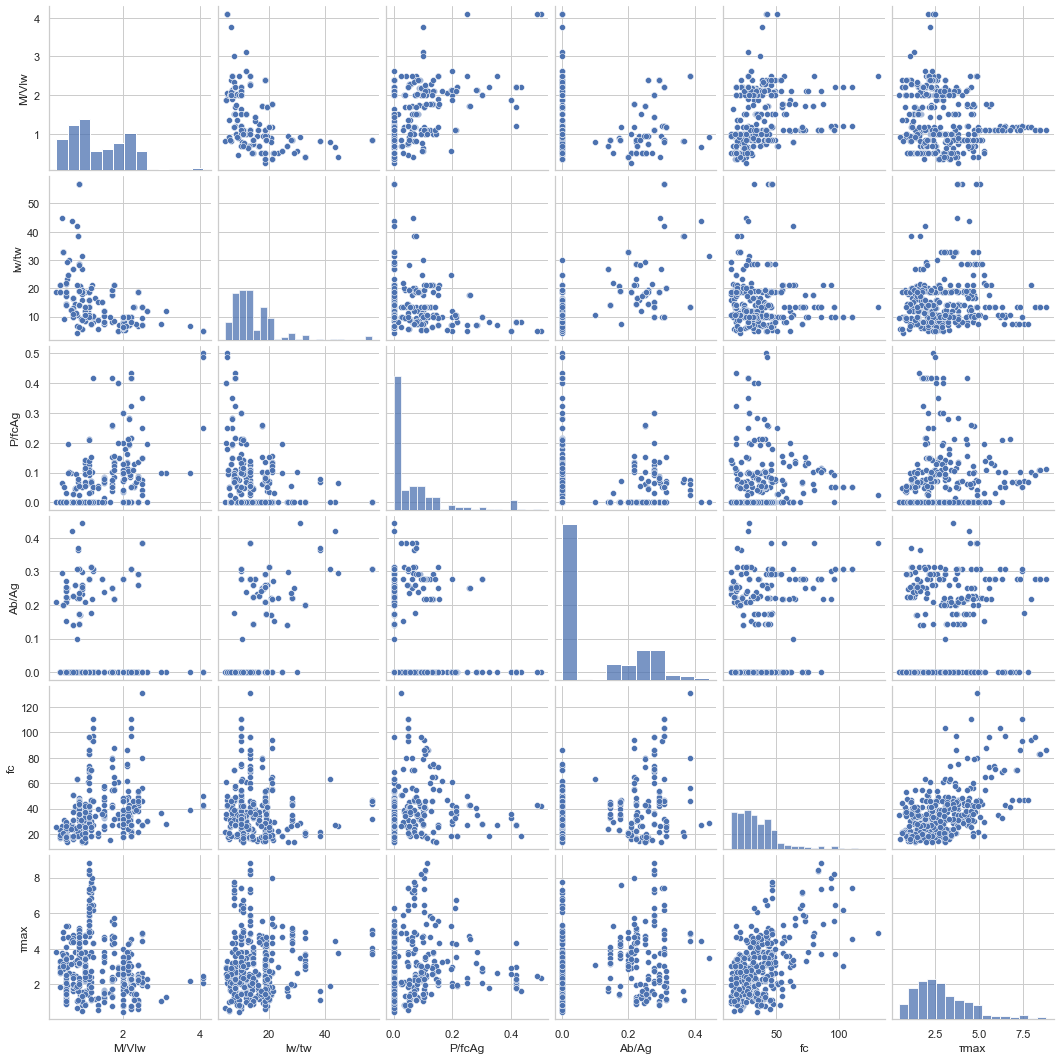

In [11]:
import seaborn as sns
quantitative_features_list1 = ['M/Vlw', 'lw/tw', 'P/fcAg', 'Ab/Ag', 'fc', 'τmax']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot1.eps',format='eps', dpi=1000)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lip\AppData\Local\Temp\ipykernel_22304\197484622.py", line 7, in <cell line: 7>
    plt.savefig('seaborn_plot2.eps',format='eps', dpi=1000)
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\pyplot.py", line 979, in savefig
    plt.axes(ax)
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\figure.py", line 3046, in savefig
    # only Figure can have toolbars
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\backend_bases.py", line 2319, in print_figure
    renderer, bbox_extra_artists=bbox_extra_artists)
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\_api\deprecation.py", line 415, in wrapper
  File "c:\Users\Lip\.conda\envs\py39\lib\site-packages\matplotlib\backends\backend_ps.py", line 869, in _prin

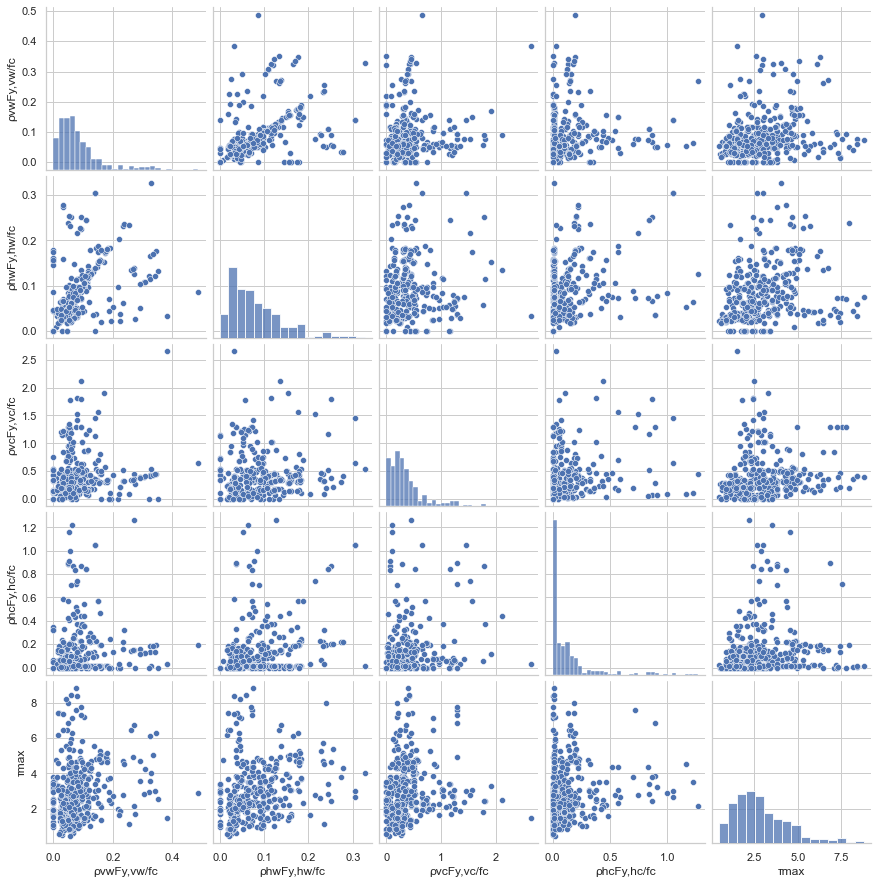

In [12]:
import seaborn as sns
quantitative_features_list1 = ['ρvwFy,vw/fc', 'ρhwFy,hw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'τmax']

data_plot_data=data_mod_num = data[quantitative_features_list1]
sns.pairplot(data_plot_data)

plt.savefig('seaborn_plot2.eps',format='eps', dpi=1000)

In [13]:
X = data.loc[:, data.columns != 'τmax']
y=data['τmax']
X.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,hw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,fc
0,1.000000,8.333333,0.050515,0.026268,0.954181,0.026268,0.000000,0.000000,19.400
1,0.559688,24.880597,0.157426,0.179372,0.799852,0.195462,0.195703,0.000000,18.300
2,2.200000,8.000000,0.086551,0.092531,0.322530,0.144580,0.216293,0.000000,18.216
3,2.100000,10.000000,0.012289,0.032444,0.137836,0.039326,0.136487,0.000000,73.560
4,0.842105,57.000000,0.326964,0.326964,0.541458,0.013994,0.000000,0.307692,31.900


In [14]:
y.head()

0    1.650000
1    5.257456
2    1.909472
3    3.326000
4    4.016239
Name: τmax, dtype: float64

In [15]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE) (training)':[],                     
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'Root Mean Squared Error (RMSE) (test)':[],      
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '10-Fold Cross Validation':[]})

In [16]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [17]:
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
features = list(data.columns.values)
print(features)

['M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,hw/fc', 'ρvcFy,vc/fc', 'ρhcFy,hc/fc', 'P/fcAg', 'Ab/Ag', 'fc', 'τmax']


Spliiting the data into training and test set


In [19]:
from sklearn.model_selection import train_test_split
indices = range(len(y))

X_train, X_test, y_train, y_test, indices_train,indices_test = train_test_split(X, y, indices, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
np.savetxt('Indices_train.csv', indices_train, delimiter=',', fmt='%s')
np.savetxt('Indices_test.csv', indices_test, delimiter=',', fmt='%s')

## Linear Regression

In [21]:

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred_tr = complex_model_1.predict(X_train)
rmse_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,pred_tr)),'.3f'))
rsq_tr  = float(format(complex_model_1.score(X_train, y_train),'.3f'))
arsq_tr = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

pred_te = complex_model_1.predict(X_test)
rmse_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_te)),'.3f'))
rsq_te  = float(format(complex_model_1.score(X_test, y_test),'.3f'))
arsq_te = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cv      = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_tr,rsq_tr,arsq_tr,rmse_te,rsq_te,arsq_te,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

Intercept: 1.3436782444561266
Coefficients: [-4.11492377 -0.15083427  1.76192011  1.20093654  2.17682907  0.77203665
  1.91346636  0.12255768  7.5027272 ]


,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
0,Multiple Regression-1,All features,0.9,0.676,0.665,0.916,0.692,0.667,0.589


In [22]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)

np.savetxt('MLR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [23]:
# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)

np.savetxt('MLR_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [24]:
X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)

np.savetxt('MLR_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('MLR_entire_actual.csv', y, delimiter=',', fmt='%s')

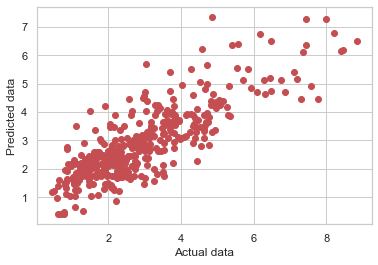

In [25]:
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

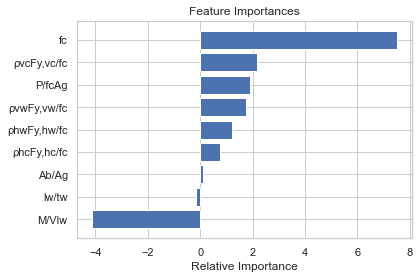

In [26]:
features = list(X.columns.values)

importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
importances

array([-4.11492377, -0.15083427,  1.76192011,  1.20093654,  2.17682907,
        0.77203665,  1.91346636,  0.12255768,  7.5027272 ])

## Ridge Regression

In [28]:


complex_model_R1 = linear_model.Ridge(alpha=1)
complex_model_R1.fit(X_train, y_train)

predR1_tr = complex_model_R1.predict(X_train)
rmseR1_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predR1_tr)),'.3f'))
rsqR1_tr  = float(format(complex_model_R1.score(X_train, y_train),'.3f'))
arsqR1_tr = float(format(adjustedR2(complex_model_R1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predR1_te = complex_model_R1.predict(X_test)
rmseR1_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predR1_te)),'.3f'))
rsqR1_te  = float(format(complex_model_R1.score(X_test, y_test),'.3f'))
arsqR1_te = float(format(adjustedR2(complex_model_R1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvR1      = float(format(cross_val_score(complex_model_R1,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_R2 = linear_model.Ridge(alpha=100)
complex_model_R2.fit(X_train, y_train)

predR2_tr = complex_model_R2.predict(X_train)
rmseR2_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predR2_tr)),'.3f'))
rsqR2_tr  = float(format(complex_model_R2.score(X_train, y_train),'.3f'))
arsqR2_tr = float(format(adjustedR2(complex_model_R2.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predR2_te = complex_model_R2.predict(X_test)
rmseR2_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predR2_te)),'.3f'))
rsqR2_te  = float(format(complex_model_R2.score(X_test, y_test),'.3f'))
arsqR2_te = float(format(adjustedR2(complex_model_R2.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvR2     = float(format(cross_val_score(complex_model_R2,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_R3 = linear_model.Ridge(alpha=1000)
complex_model_R3.fit(X_train, y_train)

predR3_tr = complex_model_R3.predict(X_train)
rmseR3_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predR3_tr)),'.3f'))
rsqR3_tr  = float(format(complex_model_R3.score(X_train, y_train),'.3f'))
arsqR3_tr = float(format(adjustedR2(complex_model_R3.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predR3_te = complex_model_R3.predict(X_test)
rmseR3_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predR3_te)),'.3f'))
rsqR3_te  = float(format(complex_model_R3.score(X_test, y_test),'.3f'))
arsqR3_te = float(format(adjustedR2(complex_model_R3.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvR3      = float(format(cross_val_score(complex_model_R3,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r]   = ['Ridge Regression','alpha=1,    all features',rmseR1_tr,rsqR1_tr,arsqR1_tr,rmseR1_te,rsqR1_te,arsqR1_te,cvR1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100,  all features',rmseR2_tr,rsqR2_tr,arsqR2_tr,rmseR2_te,rsqR2_te,arsqR2_te,cvR2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmseR3_tr,rsqR3_tr,arsqR3_tr,rmseR3_te,rsqR3_te,arsqR3_te,cvR3]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060
3,Ridge Regression,"alpha=1000, all features",1.572,0.013,-0.017,1.644,0.008,-0.065,-0.026


In [29]:
# Print the predicted and actual value for the test set
Ridge_y_test_prediction= complex_model_R1.predict(X_test)

np.savetxt('Ridge_test_prediction.csv', Ridge_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [30]:
# Print the predicted and actual value for the traing set
Ridge_y_train_prediction= complex_model_R1.predict(X_train)

np.savetxt('Ridge_train_prediction.csv', Ridge_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [31]:
X_standardized = scaler.transform(X)
Ridge_y_pred_entire_data = complex_model_R1.predict(X_standardized)

np.savetxt('Ridge_entire_prediction.csv', Ridge_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Ridge_entire_actual.csv', y, delimiter=',', fmt='%s')

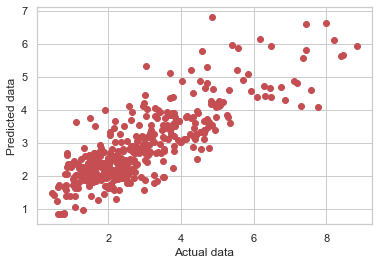

In [31]:
import matplotlib.pyplot as plt
plt.plot(y,Ridge_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

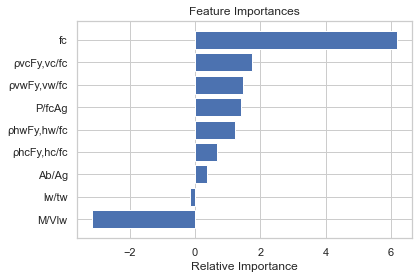

In [32]:
features = list(X.columns.values)

importances = complex_model_R1.coef_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [33]:
importances

array([-3.13416808, -0.16098037,  1.4790431 ,  1.21911804,  1.7419694 ,
        0.66965389,  1.41145807,  0.36378462,  6.17179974])

## Lasso Regression

In [34]:
complex_model_L1 = linear_model.Lasso(alpha=1)
complex_model_L1.fit(X_train, y_train)

predL1_tr = complex_model_L1.predict(X_train)
rmseL1_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predL1_tr)),'.3f'))
rsqL1_tr  = float(format(complex_model_L1.score(X_train, y_train),'.3f'))
arsqL1_tr = float(format(adjustedR2(complex_model_L1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predL1_te = complex_model_L1.predict(X_test)
rmseL1_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predL1_te)),'.3f'))
rsqL1_te  = float(format(complex_model_L1.score(X_test, y_test),'.3f'))
arsqL1_te = float(format(adjustedR2(complex_model_L1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvL1      = float(format(cross_val_score(complex_model_L1,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_L2 = linear_model.Lasso(alpha=100)
complex_model_L2.fit(X_train, y_train)

predL2_tr = complex_model_L2.predict(X_train)
rmseL2_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predL2_tr)),'.3f'))
rsqL2_tr  = float(format(complex_model_L2.score(X_train, y_train),'.3f'))
arsqL2_tr = float(format(adjustedR2(complex_model_L2.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predL2_te = complex_model_L2.predict(X_test)
rmseL2_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predL2_te)),'.3f'))
rsqL2_te  = float(format(complex_model_L2.score(X_test, y_test),'.3f'))
arsqL2_te = float(format(adjustedR2(complex_model_L2.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvL2      = float(format(cross_val_score(complex_model_L2,X_train, y_train,cv=10).mean(),'.3f'))
#
complex_model_L3 = linear_model.Lasso(alpha=1000)
complex_model_L3.fit(X_train, y_train)

predL3_tr = complex_model_L3.predict(X_train)
rmseL3_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predL3_tr)),'.3f'))
rsqL3_tr  = float(format(complex_model_L3.score(X_train, y_train),'.3f'))
arsqL3_tr = float(format(adjustedR2(complex_model_L3.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predL3_te = complex_model_L3.predict(X_test)
rmseL3_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predL3_te)),'.3f'))
rsqL3_te  = float(format(complex_model_L3.score(X_test, y_test),'.3f'))
arsqL3_te = float(format(adjustedR2(complex_model_L3.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvL3      = float(format(cross_val_score(complex_model_L3,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r]   = ['Lasso Regression','alpha=1, all features',   rmseL1_tr,rsqL1_tr,arsqL1_tr,rmseL1_te,rsqL1_te,arsqL1_te,cvL1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features', rmseL2_tr,rsqL2_tr,arsqL2_tr,rmseL2_te,rsqL2_te,arsqL2_te,cvL2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmseL3_tr,rsqL3_tr,arsqL3_tr,rmseL3_te,rsqL3_te,arsqL3_te,cvL3]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060
3,Ridge Regression,"alpha=1000, all features",1.572,0.013,-0.017,1.644,0.008,-0.065,-0.026
4,Lasso Regression,"alpha=1, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038
5,Lasso Regression,"alpha=100, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038
6,Lasso Regression,"alpha=1000, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038


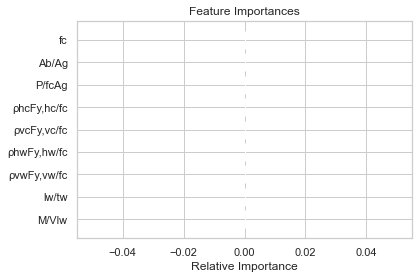

In [35]:
features = list(X.columns.values)

importances = complex_model_L1.coef_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
importances


array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [37]:
# evaluation_poly = pd.DataFrame({'Model': [],
#                                 'Details':[],
#                                 'Root Mean Squared Error (RMSE)':[],
#                                 'R-squared (training)':[],
#                                 'Adjusted R-squared (training)':[],
#                                 'R-squared (test)':[],
#                                 'Adjusted R-squared (test)':[],
#                                 '5-Fold Cross Validation':[]})



# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.LinearRegression().fit(X_trainpoly, train_data_dm['τmax'])

# pred5 = poly.predict(X_testpoly)
# rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred5)),'.3f'))
# rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data_dm['τmax'])

# pred6 = poly.predict(X_testpoly)
# rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred6)),'.3f'))
# rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data_dm['τmax'])

# pred7 = poly.predict(X_testpoly)
# rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred7)),'.3f'))
# rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data_dm['τmax'])

# pred8 = poly.predict(X_testpoly)
# rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred8)),'.3f'))
# rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_trainpoly,train_data_dm['τmax'],cv=5).mean(),'.3f'))

# polyfeat = PolynomialFeatures(degree=2)
# X_allpoly = polyfeat.fit_transform(data[features])
# X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
# X_testpoly = polyfeat.fit_transform(test_data_dm[features])
# poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data_dm['τmax'])

# pred9 = poly.predict(X_testpoly)
# rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['τmax'],pred9)),'.3f'))
# rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['τmax']),'.3f'))
# rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['τmax']),'.3f'))
# cv9 = float(format((linear_model.Lasso(alpha=50000),X_trainpoly,train_data_dm['τmax'],cv=10).mean(),'.3f'))

# r = evaluation_poly.shape[0]


# evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
# evaluation_poly.loc[r+2] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
# evaluation_poly.loc[r+3] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
# evaluation_poly.loc[r+4] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
# evaluation_poly.loc[r+5] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
# evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
# evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

## K- nearest Neighbors

In [38]:
knnreg1 = KNeighborsRegressor(n_neighbors=15)
knnreg1.fit(X_train, y_train)

predKNN1_tr = knnreg1.predict(X_train)
rmseKNN1_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNN1_tr)),'.3f'))
rsqKNN1_tr  = float(format(knnreg1.score(X_train, y_train),'.3f'))
arsqKNN1_tr = float(format(adjustedR2(knnreg1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predKNN1_te = knnreg1.predict(X_test)
rmseKNN1_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNN1_te)),'.3f'))
rsqKNN1_te  = float(format(knnreg1.score(X_test, y_test),'.3f'))
arsqKNN1_te = float(format(adjustedR2(knnreg1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvKNN1      = float(format(cross_val_score(knnreg1,X_train, y_train,cv=10).mean(),'.3f'))
#
knnreg2 = KNeighborsRegressor(n_neighbors=25)
knnreg2.fit(X_train, y_train)

predKNN2_tr = knnreg2.predict(X_train)
rmseKNN2_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNN2_tr)),'.3f'))
rsqKNN2_tr  = float(format(knnreg2.score(X_train, y_train),'.3f'))
arsqKNN2_tr = float(format(adjustedR2(knnreg2.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predKNN2_te = knnreg2.predict(X_test)
rmseKNN2_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNN2_te)),'.3f'))
rsqKNN2_te  = float(format(knnreg2.score(X_test, y_test),'.3f'))
arsqKNN2_te = float(format(adjustedR2(knnreg2.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvKNN2      = float(format(cross_val_score(knnreg2,X_train, y_train,cv=10).mean(),'.3f'))
#
knnreg3 = KNeighborsRegressor(n_neighbors=27)
knnreg3.fit(X_train, y_train)

predKNN3_tr = knnreg3.predict(X_train)
rmseKNN3_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNN3_tr)),'.3f'))
rsqKNN3_tr  = float(format(knnreg3.score(X_train, y_train),'.3f'))
arsqKNN3_tr = float(format(adjustedR2(knnreg3.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predKNN3_te    = knnreg3.predict(X_test)
rmseKNN3_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNN3_te)),'.3f'))
rsqKNN3_te  = float(format(knnreg3.score(X_test, y_test),'.3f'))
arsqKNN3_te = float(format(adjustedR2(knnreg3.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvKNN3         = float(format(cross_val_score(knnreg3,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r]   = ['KNN Regression','k=15, all features',rmseKNN1_tr,rsqKNN1_tr,arsqKNN1_tr,rmseKNN1_te,rsqKNN1_te,arsqKNN1_te,cvKNN1]
evaluation.loc[r+1] = ['KNN Regression','k=25, all features',rmseKNN2_tr,rsqKNN2_tr,arsqKNN2_tr,rmseKNN2_te,rsqKNN2_te,arsqKNN2_te,cvKNN2]
evaluation.loc[r+2] = ['KNN Regression','k=27, all features',rmseKNN3_tr,rsqKNN3_tr,arsqKNN3_tr,rmseKNN3_te,rsqKNN3_te,arsqKNN3_te,cvKNN3]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393
9,KNN Regression,"k=27, all features",1.148,0.473,0.457,1.233,0.442,0.401,0.376
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060
3,Ridge Regression,"alpha=1000, all features",1.572,0.013,-0.017,1.644,0.008,-0.065,-0.026
4,Lasso Regression,"alpha=1, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038
5,Lasso Regression,"alpha=100, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038
6,Lasso Regression,"alpha=1000, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038


## Support Vector Regression

In [39]:
from sklearn.svm import SVR
SVR_model=SVR(kernel='linear', C=1e2, degree=5)

SVR_model.fit(X_train, y_train)

predSVR_tr = SVR_model.predict(X_train)
rmseSVR_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predSVR_tr)),'.3f'))
rsqSVR_tr  = float(format(SVR_model.score(X_train, y_train),'.3f'))
arsqSVR_tr = float(format(adjustedR2(SVR_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predSVR_te = SVR_model.predict(X_test)
rmseSVR_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predSVR_te)),'.3f'))
rsqSVR_te  = float(format(SVR_model.score(X_test, y_test),'.3f'))
arsqSVR_te = float(format(adjustedR2(SVR_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))

cvSVR      = float(format(cross_val_score(SVR_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Support Vector Reg','All features',rmseSVR_tr,rsqSVR_tr,arsqSVR_tr,rmseSVR_te,rsqSVR_te,arsqSVR_te,cvSVR]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
10,Support Vector Reg,All features,0.914,0.666,0.656,0.930,0.683,0.660,0.567
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393
9,KNN Regression,"k=27, all features",1.148,0.473,0.457,1.233,0.442,0.401,0.376
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060
3,Ridge Regression,"alpha=1000, all features",1.572,0.013,-0.017,1.644,0.008,-0.065,-0.026
4,Lasso Regression,"alpha=1, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038
5,Lasso Regression,"alpha=100, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038


## Decision Tree Regression

In [40]:
    
from sklearn.tree import DecisionTreeRegressor
DT_model= DecisionTreeRegressor(random_state=0)

DT_model.fit(X_train, y_train)

predDT_tr = DT_model.predict(X_train)
rmseDT_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predDT_tr)),'.3f'))
rsqDT_tr  = float(format(DT_model.score(X_train, y_train),'.3f'))
arsqDT_tr = float(format(adjustedR2(DT_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predDT_te = DT_model.predict(X_test)
rmseDT_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predDT_te)),'.3f'))
rsqDT_te  = float(format(DT_model.score(X_test, y_test),'.3f'))
arsqDT_te = float(format(adjustedR2(DT_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvDT      = float(format(cross_val_score(DT_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree','All features',rmseDT_tr,rsqDT_tr,arsqDT_tr,rmseDT_te,rsqDT_te,arsqDT_te,cvDT]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)   

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
10,Support Vector Reg,All features,0.914,0.666,0.656,0.930,0.683,0.660,0.567
11,Decision Tree,All features,0.011,1.000,1.000,0.792,0.770,0.753,0.546
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393
9,KNN Regression,"k=27, all features",1.148,0.473,0.457,1.233,0.442,0.401,0.376
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060
3,Ridge Regression,"alpha=1000, all features",1.572,0.013,-0.017,1.644,0.008,-0.065,-0.026
4,Lasso Regression,"alpha=1, all features",1.582,0.000,-0.030,1.653,-0.002,-0.076,-0.038


In [41]:
# Print the predicted and actual value for the test set
DT_y_test_prediction= DT_model.predict(X_test)

np.savetxt('DT_test_prediction.csv', DT_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [42]:
# Print the predicted and actual value for the traing set
DT_y_train_prediction= DT_model.predict(X_train)

np.savetxt('DT_train_prediction.csv', DT_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [43]:
X_standardized = scaler.transform(X)
DT_y_pred_entire_data = DT_model.predict(X_standardized)

np.savetxt('DT_entire_prediction.csv', DT_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('DT_entire_actual.csv', y, delimiter=',', fmt='%s')

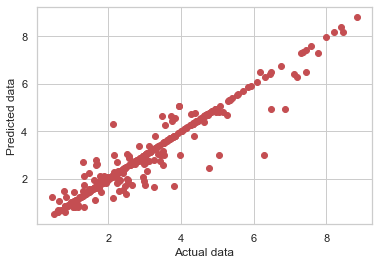

In [44]:
import matplotlib.pyplot as plt
plt.plot(y, DT_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
RF_model= RandomForestRegressor(random_state=0)

RF_model.fit(X_train, y_train)

predRF_tr = RF_model.predict(X_train)
rmseRF_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predRF_tr)),'.3f'))
rsqRF_tr  = float(format(RF_model.score(X_train, y_train),'.3f'))
arsqRF_tr = float(format(adjustedR2(RF_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predRF_te = RF_model.predict(X_test)
rmseRF_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predRF_te)),'.3f'))
rsqRF_te  = float(format(RF_model.score(X_test, y_test),'.3f'))
arsqRF_te = float(format(adjustedR2(RF_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvRF      = float(format(cross_val_score(RF_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest','All features',rmseRF_tr,rsqRF_tr,arsqRF_tr,rmseRF_te,rsqRF_te,arsqRF_te,cvRF]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
12,Random Forest,All features,0.274,0.970,0.969,0.605,0.866,0.856,0.772
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
10,Support Vector Reg,All features,0.914,0.666,0.656,0.930,0.683,0.660,0.567
11,Decision Tree,All features,0.011,1.000,1.000,0.792,0.770,0.753,0.546
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393
9,KNN Regression,"k=27, all features",1.148,0.473,0.457,1.233,0.442,0.401,0.376
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060
3,Ridge Regression,"alpha=1000, all features",1.572,0.013,-0.017,1.644,0.008,-0.065,-0.026


In [46]:
# Print the predicted and actual value for the test set
RF_y_test_prediction= RF_model.predict(X_test)

np.savetxt('RF_test_prediction.csv', RF_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [47]:
# Print the predicted and actual value for the traing set
RF_y_train_prediction= RF_model.predict(X_train)

np.savetxt('RF_train_prediction.csv', RF_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [48]:
X_standardized = scaler.transform(X)
RF_y_pred_entire_data = RF_model.predict(X_standardized)

np.savetxt('RF_entire_prediction.csv', RF_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('RF_entire_actual.csv', y, delimiter=',', fmt='%s')

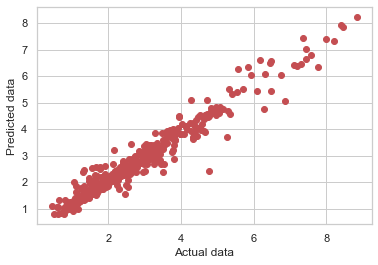

In [49]:
import matplotlib.pyplot as plt
plt.plot(y, RF_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

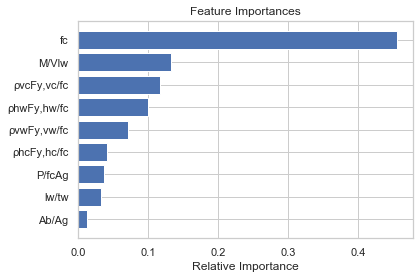

In [50]:
features = list(X.columns.values)

importances = RF_model.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
importances

array([0.13264798, 0.03209241, 0.07140488, 0.09971858, 0.11715108,
       0.04073794, 0.03698127, 0.01347243, 0.45579343])

In [52]:


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 325 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.9s finished


{'n_estimators': 136,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

## Random Forest with Optimal Parameter

In [53]:
from sklearn.ensemble import RandomForestRegressor
RF_model_opt= RandomForestRegressor(n_estimators= 136, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto',  bootstrap= 'True')

RF_model_opt.fit(X_train, y_train)

# knnreg.fit(X_train, y_train)
# pred = complex_model_1.predict(X_test)
# rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
# rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))
# artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
# rtecm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
# artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
# cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

predRFo_tr = RF_model_opt.predict(X_train)
rmseRFo_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predRFo_tr)),'.3f'))
rsqRFo_tr  = float(format(RF_model_opt.score(X_train, y_train),'.3f'))
arsqRFo_tr = float(format(adjustedR2(RF_model_opt.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predRFo_te = RF_model_opt.predict(X_test)
rmseRFo_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predRFo_te)),'.3f'))
rsqRFo_te  = float(format(RF_model_opt.score(X_test, y_test),'.3f'))
arsqRFo_te = float(format(adjustedR2(RF_model_opt.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvRFo      = float(format(cross_val_score(RF_model_opt,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest - opt','All features',rmseRFo_tr,rsqRFo_tr,arsqRFo_tr,rmseRFo_te,rsqRFo_te,arsqRFo_te,cvRFo]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
13,Random Forest - opt,All features,0.258,0.973,0.973,0.603,0.867,0.857,0.777
12,Random Forest,All features,0.274,0.970,0.969,0.605,0.866,0.856,0.772
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
10,Support Vector Reg,All features,0.914,0.666,0.656,0.930,0.683,0.660,0.567
11,Decision Tree,All features,0.011,1.000,1.000,0.792,0.770,0.753,0.546
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393
9,KNN Regression,"k=27, all features",1.148,0.473,0.457,1.233,0.442,0.401,0.376
2,Ridge Regression,"alpha=100, all features",1.499,0.103,0.075,1.580,0.084,0.017,0.060


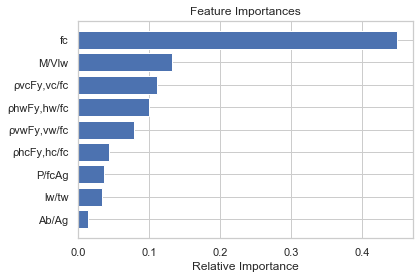

In [54]:
features = list(X.columns.values)

importances = RF_model_opt.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [55]:
importances

array([0.13255684, 0.03368651, 0.07934836, 0.09949376, 0.11091747,
       0.0435065 , 0.03714232, 0.01453191, 0.44881633])

## XG Boost Regression

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from xgboost import plot_importance
XGB_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

XGB_model.fit(X_train, y_train)

predXGB_tr = XGB_model.predict(X_train)
rmseXGB_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predXGB_tr)),'.3f'))
rsqXGB_tr  = float(format(XGB_model.score(X_train, y_train),'.3f'))
arsqXGB_tr = float(format(adjustedR2(XGB_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predXGB_te = XGB_model.predict(X_test)
rmseXGB_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predXGB_te)),'.3f'))
rsqXGB_te  = float(format(XGB_model.score(X_test, y_test),'.3f'))
arsqXGB_te = float(format(adjustedR2(XGB_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvXGB      = float(format(cross_val_score(XGB_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['XG Boost','All features',rmseXGB_tr,rsqXGB_tr,arsqXGB_tr,rmseXGB_te,rsqXGB_te,arsqXGB_te,cvXGB]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
14,XG Boost,All features,0.059,0.999,0.999,0.514,0.903,0.896,0.815
13,Random Forest - opt,All features,0.258,0.973,0.973,0.603,0.867,0.857,0.777
12,Random Forest,All features,0.274,0.970,0.969,0.605,0.866,0.856,0.772
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
10,Support Vector Reg,All features,0.914,0.666,0.656,0.930,0.683,0.660,0.567
11,Decision Tree,All features,0.011,1.000,1.000,0.792,0.770,0.753,0.546
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393
9,KNN Regression,"k=27, all features",1.148,0.473,0.457,1.233,0.442,0.401,0.376


In [57]:
# Print the predicted and actual value for the test set
XG_y_test_prediction= XGB_model.predict(X_test)

np.savetxt('XG_test_prediction.csv', XG_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XG_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [58]:
# Print the predicted and actual value for the traing set
XG_y_train_prediction= XGB_model.predict(X_train)

np.savetxt('XG_train_prediction.csv', XG_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XG_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [59]:
X_standardized = scaler.transform(X)
XG_y_pred_entire_data = XGB_model.predict(X_standardized)

np.savetxt('XG_entire_prediction.csv', XG_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XG_entire_actual.csv', y, delimiter=',', fmt='%s')

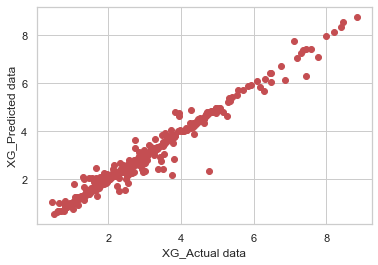

In [60]:
import matplotlib.pyplot as plt
plt.plot(y, XG_y_pred_entire_data,  'ro')
plt.ylabel('XG_Predicted data')
plt.xlabel('XG_Actual data')
plt.show()

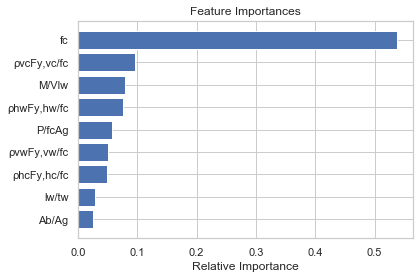

In [61]:
#XGB_model.feature_importances_
features = list(X.columns.values)

importances = XGB_model.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
importances

array([0.07995687, 0.02933685, 0.05060507, 0.07657997, 0.09538826,
       0.04800431, 0.0579999 , 0.02439767, 0.53773105], dtype=float32)

### Optimal parameter for XGBOOST

In [63]:
# #for tuning parameters
# #from sklearn.grid_search import GridSearchCV   #Performing grid search
# from sklearn.model_selection import GridSearchCV

# parameters_for_testing = {
#     'colsample_bytree':[0.4,0.6,0.8],
#     'gamma':[0,0.03,0.1,0.3],
#     'min_child_weight':[1.5,6,10],
#     'learning_rate':[0.1,0.07],
#     'max_depth':[3,5],
#     'n_estimators':[10000],
#     'reg_alpha':[1e-5, 1e-2,  0.75],
#     'reg_lambda':[1e-5, 1e-2, 0.45],
#     'subsample':[0.6,0.95]  
# }

                    
# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(train_data_dm[features],train_data_dm['τmax'])
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)#for tuning parameters
# parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
# }

                    
# xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(train_x,train_y)
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)

## ADABOOST REGRESSION

In [64]:

from sklearn.ensemble import AdaBoostRegressor


ADB_model = AdaBoostRegressor(random_state=0, n_estimators=100)
ADB_model.fit(X_train, y_train)

predADB_tr = ADB_model.predict(X_train)
rmseADB_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predADB_tr)),'.3f'))
rsqADB_tr  = float(format(ADB_model.score(X_train, y_train),'.3f'))
arsqADB_tr = float(format(adjustedR2(ADB_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))

predADB_te = ADB_model.predict(X_test)
rmseADB_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predADB_te)),'.3f'))
rsqADB_te  = float(format(ADB_model.score(X_test, y_test),'.3f'))
arsqADB_te = float(format(adjustedR2(ADB_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
cvADB      = float(format(cross_val_score(ADB_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost','All features',rmseADB_tr,rsqADB_tr,arsqADB_tr,rmseADB_te,rsqADB_te,arsqADB_te,cvADB]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)


,Model,Details,Root Mean Squared Error (RMSE) (training),R-squared (training),Adjusted R-squared (training),Root Mean Squared Error (RMSE) (test),R-squared (test),Adjusted R-squared (test),10-Fold Cross Validation
14,XG Boost,All features,0.059,0.999,0.999,0.514,0.903,0.896,0.815
13,Random Forest - opt,All features,0.258,0.973,0.973,0.603,0.867,0.857,0.777
12,Random Forest,All features,0.274,0.970,0.969,0.605,0.866,0.856,0.772
15,AdaBoost,All features,0.680,0.815,0.810,0.778,0.778,0.761,0.671
1,Ridge Regression,"alpha=1, all features",0.927,0.657,0.646,0.975,0.651,0.626,0.591
0,Multiple Regression-1,All features,0.900,0.676,0.665,0.916,0.692,0.667,0.589
10,Support Vector Reg,All features,0.914,0.666,0.656,0.930,0.683,0.660,0.567
11,Decision Tree,All features,0.011,1.000,1.000,0.792,0.770,0.753,0.546
7,KNN Regression,"k=15, all features",0.964,0.629,0.617,1.067,0.583,0.552,0.473
8,KNN Regression,"k=25, all features",1.116,0.502,0.487,1.205,0.468,0.428,0.393


In [65]:
# Print the predicted and actual value for the test set
AD_y_test_prediction= ADB_model.predict(X_test)

np.savetxt('AD_test_prediction.csv', AD_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('AD_test_actual.csv', y_test, delimiter=',', fmt='%s')

In [66]:
# Print the predicted and actual value for the traing set
AD_y_train_prediction= ADB_model.predict(X_train)

np.savetxt('AD_train_prediction.csv', AD_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('AD_train_actual.csv', y_train, delimiter=',', fmt='%s')

In [67]:
X_standardized = scaler.transform(X)
AD_y_pred_entire_data = ADB_model.predict(X_standardized)

np.savetxt('AD_entire_prediction.csv', AD_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('AD_entire_actual.csv', y, delimiter=',', fmt='%s')

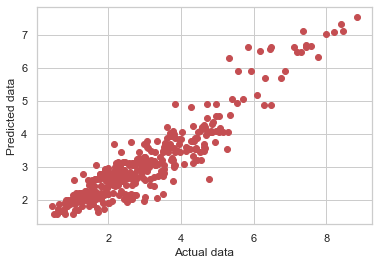

In [68]:
import matplotlib.pyplot as plt
plt.plot(y, AD_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

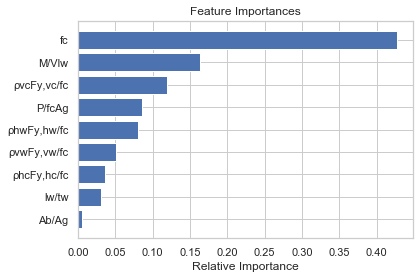

In [69]:
features = list(X.columns.values)

importances = ADB_model.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [70]:
importances

array([0.16374043, 0.03030858, 0.05082721, 0.08065027, 0.119582  ,
       0.03656661, 0.08532145, 0.00581623, 0.42718721])

## From the models, XGBOOST is the one having highest accuracy